In [30]:
## The Iris classification Problem
Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to classify flowers statistically. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their sepals and petals.

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor


SyntaxError: invalid syntax (<ipython-input-30-9d3e0340c25d>, line 2)

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

### Import or upload dataset

In [ ]:
#Load Data
iris = pd.read_csv('../input/Iris.csv')

#### Preview of Data

In [ ]:
iris.shape

* There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
* There are no null values, so we don't have to worry about that.
* There are 50 observations of each species (setosa, versicolor, virginica).

### Let's view top 5 and bottom 5 records from dataset

In [31]:
# View Top 5 records
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# View bottom 5 records
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Let's check, If there is any inconsistency in the dataset

In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we see above, there are no null values in the dataset, so the data can be processed

### Exploratory Data Analysis (EDA)

#### Let's check some statistical facts

In [34]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#### Data Visualization

* After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
* There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

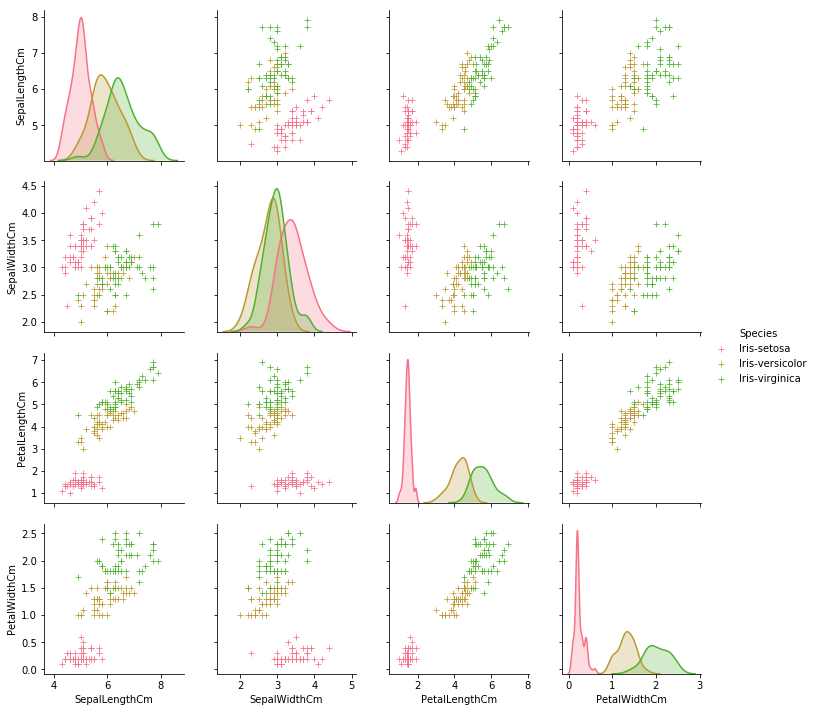

In [36]:
iris1 = iris.drop('Id', axis=1)
g = sns.pairplot(iris1, hue='Species', markers='+')
plt.show()

#### Visualization1 : Sepal Length VS Width
This graph shows relationship between the **sepal length** and **sepal width**.

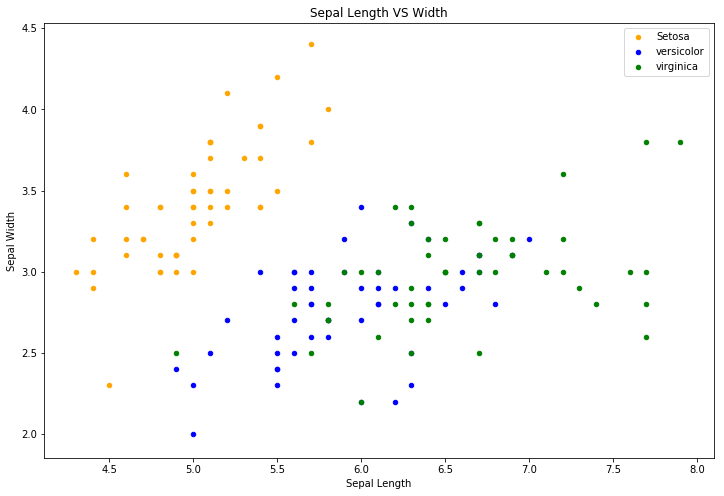

In [37]:
fig = iris1[iris1.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris1[iris1.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris1[iris1.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

#### Visualization2 : Sepal Length VS Width
> This graph shows relationship between the **petal length** and **petal width**.

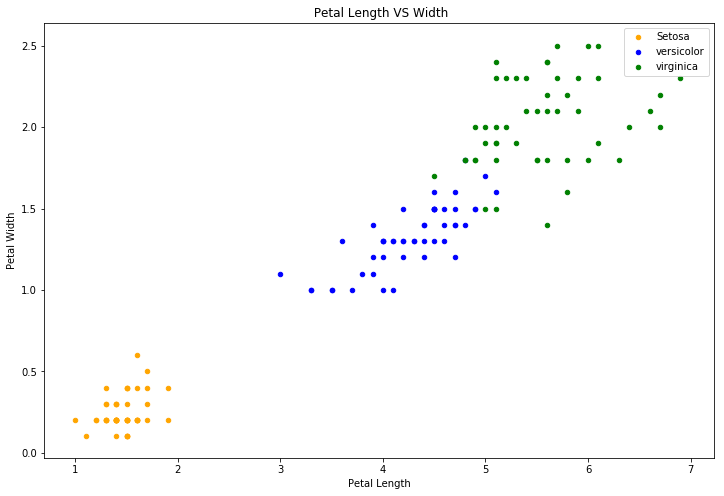

In [38]:
fig = iris1[iris1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris1[iris1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris1[iris1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

#### Now let us see how are the length and width are distributed

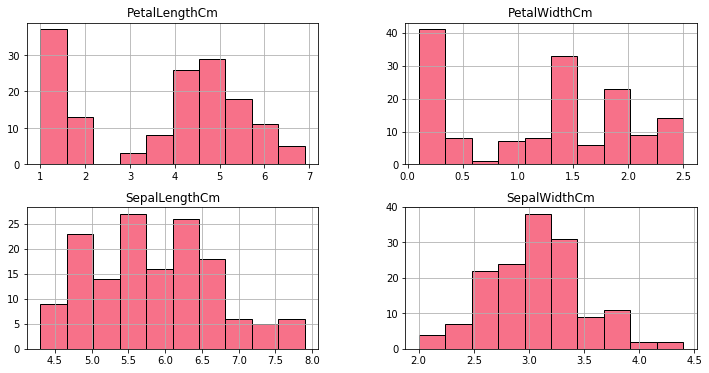

In [39]:
iris1.hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### Now let us see how the length and width vary according to the species

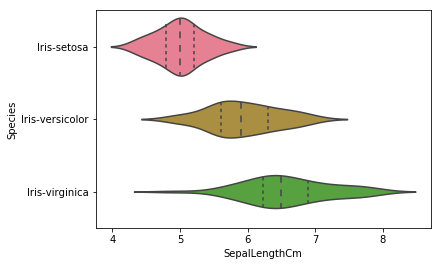

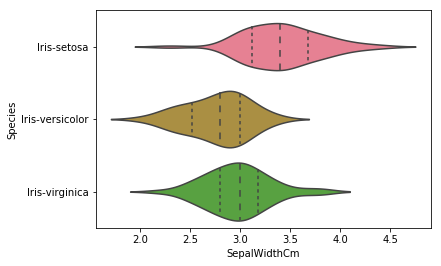

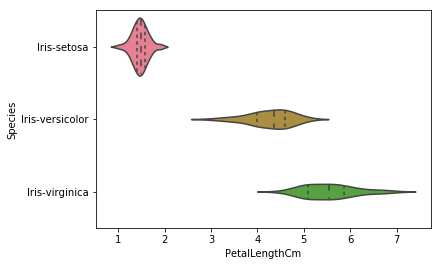

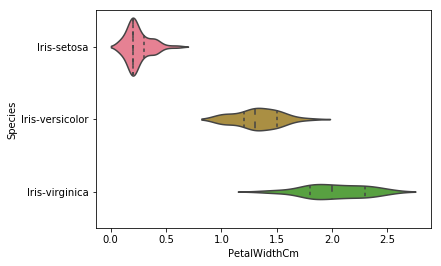

In [40]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris1, inner='quartile')
plt.show()

As we all know that the given problem is a classification problem. Thus we will be using the classification algorithms to build a model.

Before we start, we need to clear some ML notations.

**Attributes-->** An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

**Target Variable-->**, In the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

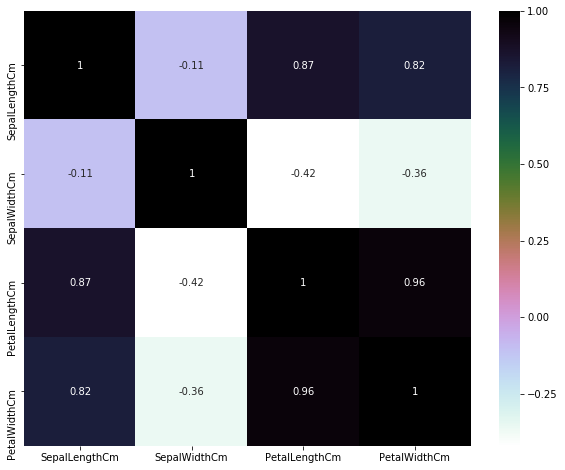

In [41]:
plt.figure(figsize=(10,8)) 
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

## Build Model with Scikit-learn

#### Steps To Be followed When Applying an Algorithm
**Step 1:** Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

**Step2:** Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

**Step3:** Then pass the training dataset to the algorithm to train it. We use the **.fit()** method

**Step4:** Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

**Step5:** We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Spilit the training and test dataset

In [42]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [43]:
from sklearn.model_selection import train_test_split  #to split the dataset for training and testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


Let's check the Train and Test Dataset

In [45]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5


In [46]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [47]:
y_train.head()

32         Iris-setosa
52     Iris-versicolor
70     Iris-versicolor
121     Iris-virginica
144     Iris-virginica
Name: Species, dtype: object

In [48]:
y_test.head()

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
Name: Species, dtype: object

#### Classification Algorithms: which we used with this IRIS (structured) dataset

1. Logistic Regression
2. Decision Tree
3. Support Vector Machine (SVM)
4. K-Nearest Neighbours

In [49]:
# Importing alll the necessary packages to use the various classification algorithms

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import metrics #for checking the model accuracy

### Logistic Regression

In [50]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
acc_log = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression is', acc_log)

The accuracy of the Logistic Regression is 0.8888888888888888


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Decision Tree

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree is', acc_dt)

The accuracy of the Decision Tree is 0.9777777777777777


### Support Vector Machine (SVM)

In [52]:
sv = svm.SVC() #select the algorithm
sv.fit(X_train,y_train) # we train the algorithm with the training data and the training output
y_pred = sv.predict(X_test) #now we pass the testing data to the trained algorithm
acc_svm = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 1.0


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### K-Nearest Neighbours

In [53]:
knc = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc_knn = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the KNN is', acc_knn)

The accuracy of the KNN is 0.9777777777777777


Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x78bb908a7978>,
 <a list of 10 Text xticklabel objects>)

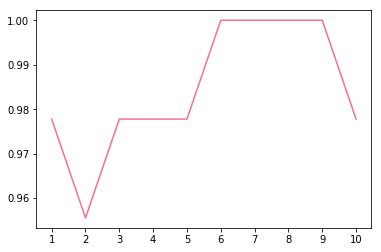

In [54]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    kcs = KNeighborsClassifier(n_neighbors=i) 
    kcs.fit(X_train,y_train)
    y_pred = kcs.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [55]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines',
              'K-Nearest Neighbours'],
    'Score': [acc_log, acc_dt, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,1.000000
1,Decision Tree,0.977778
3,K-Nearest Neighbours,0.977778
0,Logistic Regression,0.888889


Here, We have implemented some of the common Machine Learning classification algorithms. Since given dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I hope this kernal is useful to you to learn machine learning from the scratch with IRIS dataset.

If find this notebook help you to learn, **Please Upvote.**

##### Thank You!!